<a href="https://colab.research.google.com/github/frcaulia/machine_learning/blob/main/Module_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Faricha Aulia ✨**
Machine Learning Course : Module 7 Lab Work Assignment

---

### **Create a K-Means model with the following conditions:**
1. **Use the 'Mall_Customers.csv' data.**
2. **Determine the appropriate features for clustering (at least 2).**
3. **Create a K-Means model considering the best number of clusters.**
4. **Reimplement the model by using SOM.**

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load Dataset
dfmc = pd.read_csv('JS7-LW-Assignment-Mall-Customers.csv')
dfmc.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Data Preprocessing**

In [4]:
dfmc.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [6]:
# Check null
dfmc.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Encoding**

In [7]:
from sklearn.preprocessing import LabelEncoder

# Encoding fitur Gender
encoder = LabelEncoder()
dfmc['Gender'] = encoder.fit_transform(dfmc['Gender'])
dfmc.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [11]:
# Choose feature
feature = dfmc[['Annual Income (k$)', 'Spending Score (1-100)']]

**Standarisasi**

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(feature)

**Elbow Method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

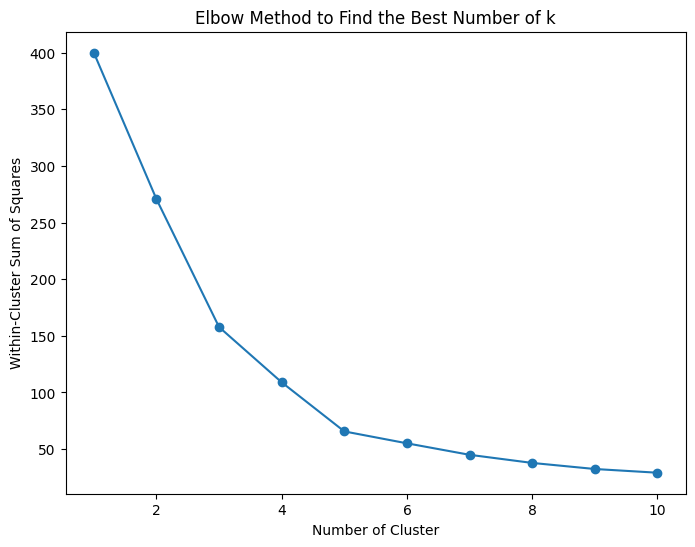

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Membuat plot elbow
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Find the Best Number of k')
plt.xlabel('Number of Cluster')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

In [15]:
# Make K-Means Model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Add cluster labels
dfmc['Cluster'] = cluster_labels
dfmc.head(20)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,2
1,2,1,21,15,81,3
2,3,0,20,16,6,2
3,4,0,23,16,77,3
4,5,0,31,17,40,2
5,6,0,22,17,76,3
6,7,0,35,18,6,2
7,8,0,23,18,94,3
8,9,1,64,19,3,2
9,10,0,30,19,72,3


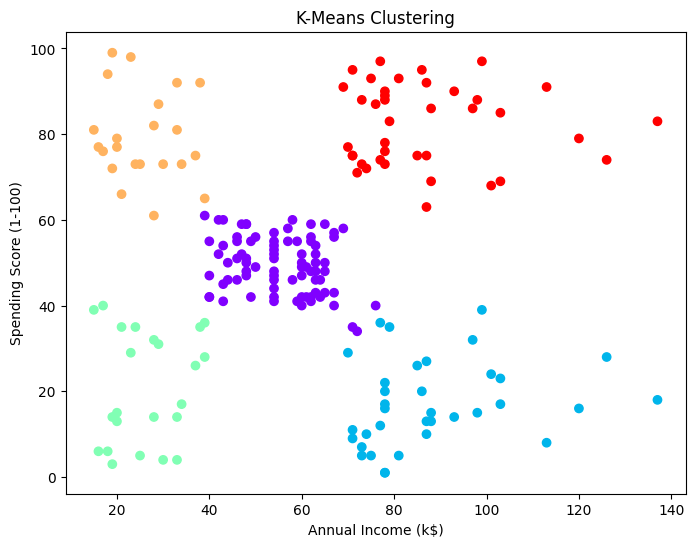

In [17]:
plt.figure(figsize=(8, 6))

plt.scatter(dfmc['Annual Income (k$)'], dfmc['Spending Score (1-100)'], c=cluster_labels, cmap='rainbow')

plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

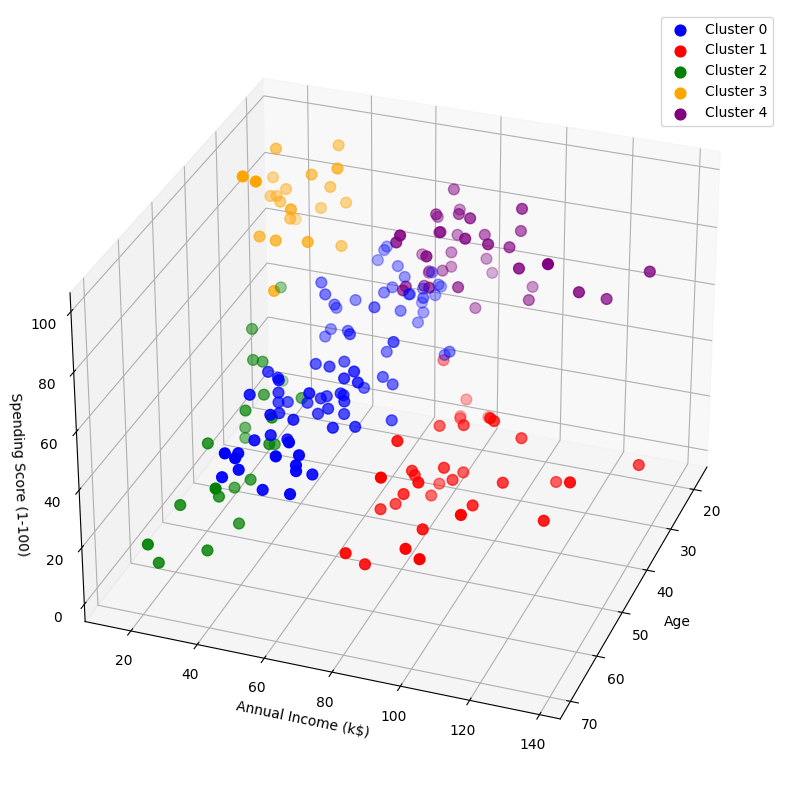

In [18]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

# List of colors for each cluster
colors = ['blue', 'red', 'green', 'orange', 'purple']

# Loop to plot each cluster with the corresponding color
for cluster_label, color in zip(range(5), colors):
    ax.scatter(
        dfmc.Age[dfmc.Cluster == cluster_label],
        dfmc["Annual Income (k$)"][dfmc.Cluster == cluster_label],
        dfmc["Spending Score (1-100)"][dfmc.Cluster == cluster_label],
        c=color,
        s=60,
        label=f'Cluster {cluster_label}'
    )

ax.view_init(elev=30, azim=20)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')

# Add a legend
ax.legend(loc='best')

plt.show()

### **Using SOM**

In [22]:
!pip install MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=532ee9dc9e3c24fdc7624c24b7546cd2361e38626c56357c766689da3d0ddc66
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built MiniSom


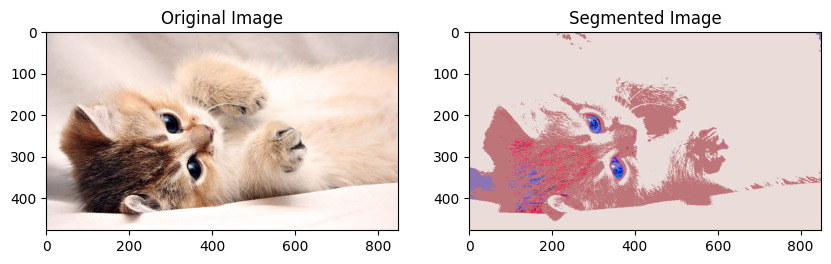

In [29]:
from PIL import Image
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt

# Load Image
image_path = "meow.jpg"
img = Image.open(image_path)
img_data = np.asarray(img)
img_data = img_data / 255.0

# Reshape the image data
flat_img_data = img_data.reshape(-1, 3)

# Create a Self-Organizing Map (SOM)
som_dimension = 10
som = MiniSom(som_dimension, som_dimension, 3, sigma=0.3, learning_rate=0.5)
som.train_random(flat_img_data, 100)

# Segment the image using the SOM
segmented_img_data = np.zeros_like(flat_img_data)
for i, x in enumerate(flat_img_data):
    winner = som.winner(x)
    weights = som.get_weights()[winner[0], winner[1]]
    segmented_img_data[i] = weights

# Reshape the segmented image data
segmented_img = segmented_img_data.reshape(img_data.shape)

# Display the original and segmented images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(segmented_img)
plt.title("Segmented Image")
plt.show()